In [205]:
import pandas as pd

In [206]:
counts = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD',index_col='Date',parse_dates=True)

In [207]:
len(counts)

39384

In [208]:
counts.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [209]:
weather = pd.read_csv(r'data/BicycleWeather.csv',index_col='DATE',parse_dates=True)

In [210]:
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [211]:
#Let's use timeseries to get the index to show dates

daily = counts.resample('d').sum()

In [212]:
daily.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03,1760.0,1761.0
2012-10-04,1708.0,1767.0
2012-10-05,1558.0,1590.0
2012-10-06,1080.0,926.0
2012-10-07,1191.0,951.0


In [213]:
daily['Total'] = daily.sum(axis=1)

In [214]:
daily.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk,Total
Date,,,
2012-10-03,1760.0,1761.0,3521.0
2012-10-04,1708.0,1767.0,3475.0
2012-10-05,1558.0,1590.0,3148.0
2012-10-06,1080.0,926.0,2006.0
2012-10-07,1191.0,951.0,2142.0


In [215]:
daily = daily[['Total']]

In [216]:
daily.head()

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


In [217]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [218]:
for x in range(7):
    daily[days[x]] = (daily.index.dayofweek == x).astype(float)

In [219]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [220]:
# daily.index.dayofweek returns day of the week info
daily.index.dayofweek

array([2, 3, 4, ..., 2, 3, 4], dtype=int32)

In [221]:
#LETS FIGURE OUT ALL THE HOLIDAYS
from pandas.tseries.holiday import USFederalHolidayCalendar

In [222]:
cal = USFederalHolidayCalendar()
cal

In [223]:
holidays = cal.holidays('2012','2017')

In [224]:
holidays

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28',
               '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-12',
               '2012-11-22', '2012-12-25', '2013-01-01', '2013-01-21',
               '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02',
               '2013-10-14', '2013-11-11', '2013-11-28', '2013-12-25',
               '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26',
               '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11',
               '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19',
               '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25',
               '2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30',
               '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11',
               '2016-11-24', '2016-12-26'],
              dtype='datetime64[ns]', freq=None)

In [225]:
daily = daily.join(pd.Series(1,index=holidays, name='holidays'))

In [226]:
pd.Series(1, index=holidays, name = 'Holidays').head()

2012-01-02    1
2012-01-16    1
2012-02-20    1
2012-05-28    1
2012-07-04    1
Name: Holidays, dtype: int64

In [227]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holidays
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [228]:
daily['holidays'].fillna(0,inplace=True)

In [229]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holidays
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-08,3537.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-10-09,3501.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-10,3235.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-11,3047.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [230]:
#FACTORING DAYLIGHT SAVINGS
#    Standard function below for calculating hours of daylight for a given date

In [231]:
import numpy as np
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

In [232]:
daily['daylight_hrs'] = list(map(hours_of_daylight,daily.index))

In [233]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holidays,daylight_hrs
Date,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208


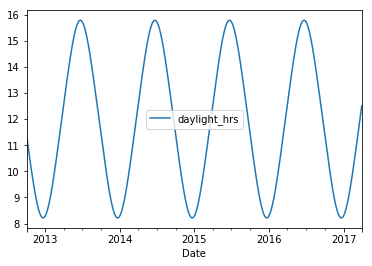

In [234]:
%matplotlib inline
daily[['daylight_hrs']].plot()

In [235]:
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [236]:
#Now we need maximum and minimum temp. But they will tip the scale and they are big numbers. Hence we take log10

In [237]:
weather['TMAX'] /= 10
weather['TMIN'] /= 10

In [244]:
#Let's find the average daily temperature for each day. 
weather['Daily_Temp'] = 0.5 * (weather['TMIN'] + weather['TMAX'])
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03,Daily_Temp,dry day
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.000000,0,0,12.8,5.0,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,8.90,1
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.429134,0,0,10.6,2.8,45,180,200,...,-9999,-9999,-9999,1,1,-9999,-9999,-9999,6.70,0
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.031496,0,0,11.7,7.2,23,180,170,...,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,9.45,0
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.799213,0,0,12.2,5.6,47,180,190,...,-9999,-9999,-9999,1,1,-9999,-9999,-9999,8.90,0
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.051181,0,0,8.9,2.8,61,200,220,...,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,5.85,0


In [245]:
#Let's check the precipitation
#Creating a new column for dry day using 1-PRCP approach
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

In [240]:
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03,Daily_Temp,dry day
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.000000,0,0,12.8,5.0,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,8.90,1
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.429134,0,0,10.6,2.8,45,180,200,...,-9999,-9999,-9999,1,1,-9999,-9999,-9999,6.70,0
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.031496,0,0,11.7,7.2,23,180,170,...,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,9.45,0
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.799213,0,0,12.2,5.6,47,180,190,...,-9999,-9999,-9999,1,1,-9999,-9999,-9999,8.90,0
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.051181,0,0,8.9,2.8,61,200,220,...,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,5.85,0


In [242]:
daily = daily.join(weather[['PRCP','Daily_Temp', 'dry day']])

In [243]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holidays,daylight_hrs,PRCP,Daily_Temp,dry day
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.000000,13.35,1.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.000000,13.60,1.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.000000,15.30,1.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.000000,15.85,1.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.000000,15.85,1.0
2012-10-08,3537.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.987503,0.000000,14.45,1.0
2012-10-09,3501.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.929950,0.000000,12.50,1.0
2012-10-10,3235.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.872560,0.000000,10.25,1.0
2012-10-11,3047.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.815345,0.000000,10.55,1.0


In [246]:
daily.index

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-06',
               '2012-10-07', '2012-10-08', '2012-10-09', '2012-10-10',
               '2012-10-11', '2012-10-12',
               ...
               '2017-03-22', '2017-03-23', '2017-03-24', '2017-03-25',
               '2017-03-26', '2017-03-27', '2017-03-28', '2017-03-29',
               '2017-03-30', '2017-03-31'],
              dtype='datetime64[ns]', name=u'Date', length=1641, freq='D')

In [247]:
daily['annual'] =  (daily.index - daily.index[0]).days /365

In [251]:

(daily.index - daily.index[0]).days #Year number

array([   0,    1,    2, ..., 1638, 1639, 1640])

In [253]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holidays,daylight_hrs,PRCP,Daily_Temp,dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0


In [263]:


column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holidays',
                'daylight_hrs', 'PRCP', 'dry day', 'Daily_Temp', 'annual']
X = daily[column_names] # Feature matrix
y = daily['Total'] #Target Vector

In [264]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
#fit_intercept is false because daily flags operate on own day spefic data

In [265]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [266]:

daily['predicted'] = model.predict(X)

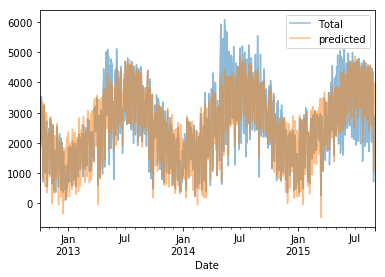

In [267]:

daily[['Total','predicted']].plot(alpha=0.5)

In [268]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holidays,daylight_hrs,PRCP,Daily_Temp,dry day,annual,predicted
Date,,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.000000,13.35,1.0,0,3455.688160
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.000000,13.60,1.0,0,3353.715196
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.000000,15.30,1.0,0,3152.053687
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.000000,15.85,1.0,0,1899.227283
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.000000,15.85,1.0,0,1861.396419
2012-10-08,3537.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.987503,0.000000,14.45,1.0,0,2213.874677
2012-10-09,3501.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.929950,0.000000,12.50,1.0,0,3372.066412
2012-10-10,3235.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.872560,0.000000,10.25,1.0,0,3200.719523
2012-10-11,3047.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.815345,0.000000,10.55,1.0,0,3102.132573
